## Exploring The Data 
## 01. Melnourne Home Prices

In [1]:
# import
import pandas as pd
# save filepath to variable for easier access
melbourne_file_path = './data/melbourne-housing-snapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_home_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# 02. Iowa Home data

In [4]:
# import
import pandas as pd
# save filepath to variable for easier access
iowa_file_path = './data/iowa_home_data/train.csv'
# read the data and store data in DataFrame titled melbourne_data
iowa_home_data = pd.read_csv(iowa_file_path) 
# print a summary of the data in Melbourne data
iowa_home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


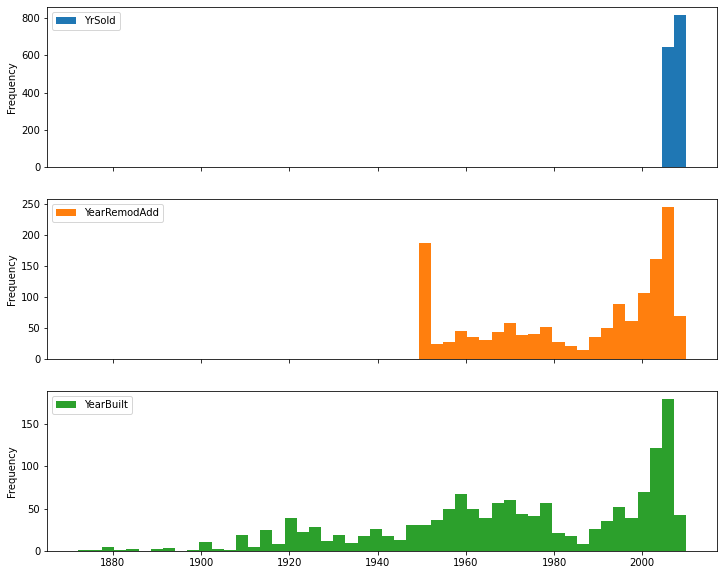

In [6]:
# Extract three relevant columns from home data into a new dataframe
df = iowa_home_data[['YrSold', 'YearRemodAdd', 'YearBuilt']]
# Create a histogram from each column sharing the same x-axis
df.plot.hist(figsize=(12, 10), subplots=True, bins=50); # plot requires matplotlib

## how old is the newest home?

In [13]:
iowa_home_data[['YrSold','YearBuilt']].describe()

,YrSold,YearBuilt
count,1460.000000,1460.000000
mean,2007.815753,1971.267808
std,1.328095,30.202904
min,2006.000000,1872.000000
25%,2007.000000,1954.000000
50%,2008.000000,1973.000000
75%,2009.000000,2000.000000
max,2010.000000,2010.000000


In [9]:
from datetime import date
current_year = date.today().year;
newest_home_age = (current_year - iowa_home_data.loc[:,'YearBuilt'].max()) #df.loc[rows:columns]
print(newest_home_age)

11


## What is the average lot size (rounded to nearest integer)?

In [12]:
avg_lot_size = iowa_home_data.loc[:,'LotArea'].mean()
avg_lot_size = round(avg_lot_size, 0)
print(avg_lot_size)

10517.0
